In [34]:
import pandas as pd

df = pd.read_csv("diabetes.csv")  
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [35]:
df.info()
df.isnull().sum()  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

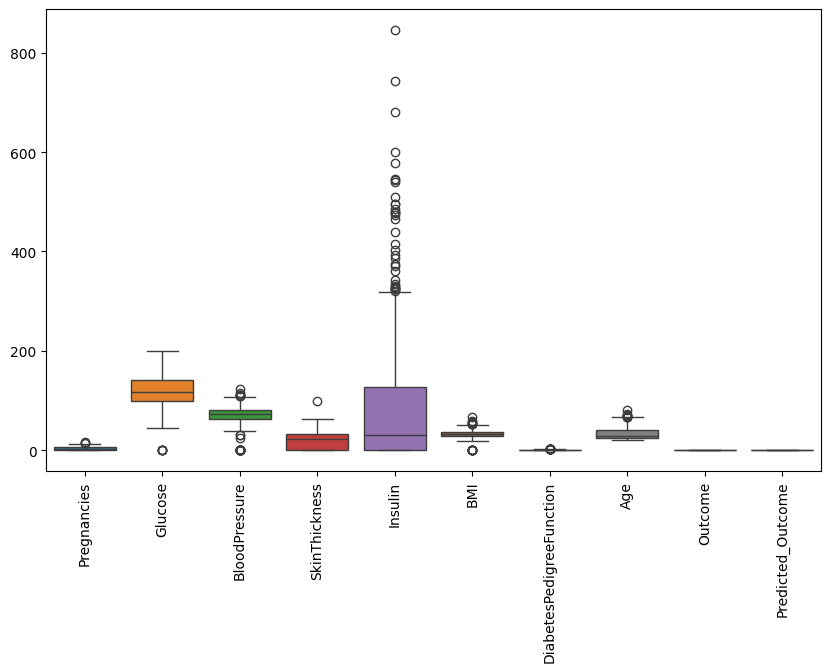

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled["Outcome"] = df["Outcome"]


In [73]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop("Outcome", axis=1)
y = df_scaled["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)#Trains the logistic regression model using X_Train and Y_Train
y_pred_log = log_reg.predict(X_test)#Predicts the value of outcome based on values in X_Test and the corresponding valoes(0 or 1) are stored in y_pred_log


In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Accuracy = (Number of correct predictions) / (Total number of predictions).

Precision → How many predicted positives are actually positive?

Recall → How many actual positives were correctly predicted?

F1-score → Harmonic mean of precision and recall ->F1-Score=2×(Precision*Recall)/(Precision+Recall)

Support → Number of true instances for each class.

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def evaluate_model(model_name,y_true,y_pred):
    print(f"\nModel: {model_name}")
    print("Accuracy:",accuracy_score(y_true,y_pred))
    print(classification_report(y_true,y_pred))
    print("Confusion Matrix:",confusion_matrix(y_true,y_pred))
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


Model: Logistic Regression
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix: [[82 18]
 [26 28]]

Model: Decision Tree
Accuracy: 0.7922077922077922
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix: [[84 16]
 [16 38]]

Model: Random Forest
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
    

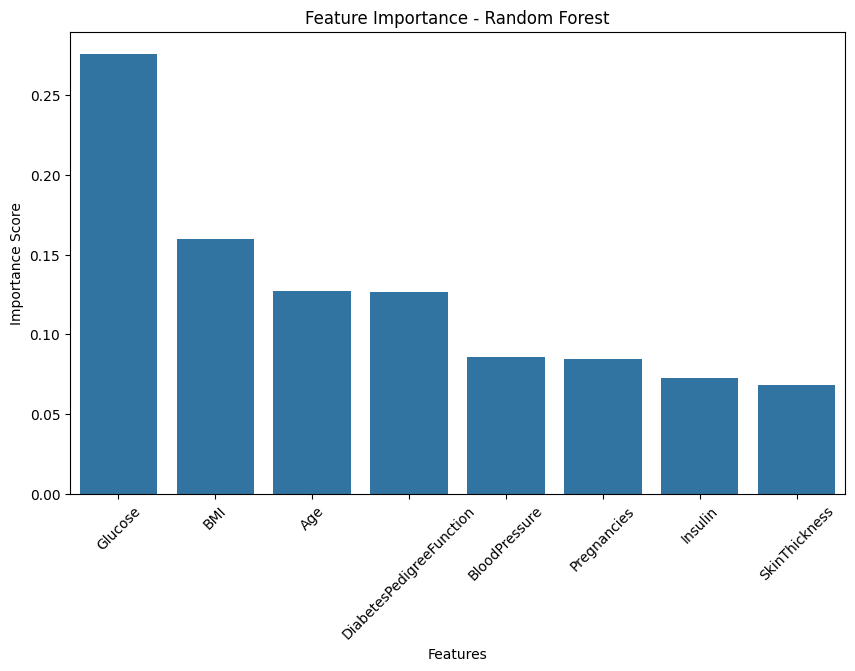

In [64]:
import numpy as np
features_importance = rf.feature_importances_  # Variable defined with 's' after 'features'
indices = np.argsort(features_importance)[::-1]  # Use the correct variable name here
plt.figure(figsize=(10,6))
sns.barplot(x=[X.columns[i] for i in indices], y=features_importance[indices])  # Use the correct variable name here
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()


-ROC = Receiver Operating Characteristic Curve

-It shows the balance between catching real diabetes cases (True Positives) and avoiding false alarms (False Positives)
.
-auc=Area under the ROC Curve

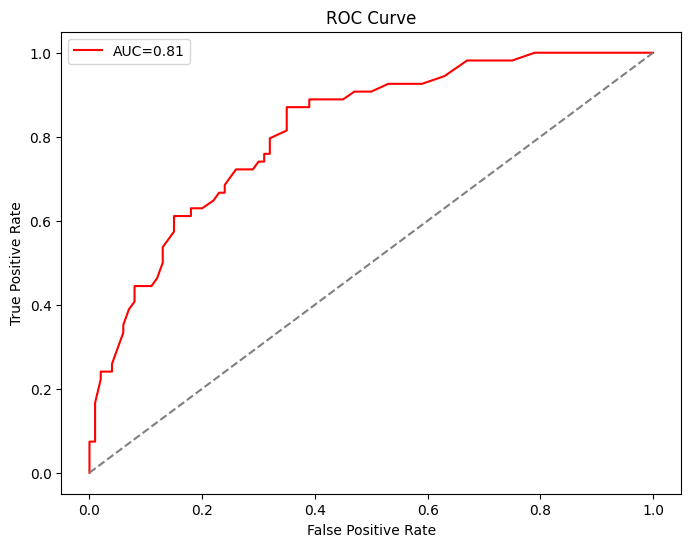

In [83]:
from sklearn.metrics import roc_curve,auc
y_prob_rf=rf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_prob_rf)#fpr=False Positive,tpr=True Positive,_=Threshold 
roc_auc = auc(fpr, tpr)#Calculates the area under the ROC curve, which tells us:How well does our model separate diabetes cases from non-diabetes cases?
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',label=f"AUC={roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [84]:
 df["Predicted_Outcome"] = rf.predict(df.drop(["Outcome", "Predicted_Outcome"], axis=1, errors="ignore"))
 df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted_Outcome
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the feature columns
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Function to take user input
def get_user_input():
    print("Please enter the following details to predict if you have diabetes:")
    pregnancies = int(input("Pregnancies: "))
    glucose = int(input("Glucose: "))
    blood_pressure = int(input("BloodPressure: "))
    skin_thickness = int(input("SkinThickness: "))
    insulin = int(input("Insulin: "))
    bmi = float(input("BMI: "))
    diabetes_pedigree_function = float(input("DiabetesPedigreeFunction: "))
    age = int(input("Age: "))
    
    return np.array([[pregnancies, glucose, blood_pressure, skin_thickness, 
                      insulin, bmi, diabetes_pedigree_function, age]])

train_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],  # Diabetic
                       [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Non-diabetic
                       [8, 183, 64, 0, 0, 23.3, 0.672, 32]])  # Diabetic
train_labels = np.array([1, 0, 1])  # 1 = Diabetic, 0 = Non-diabetic

scaler = StandardScaler()
scaler.fit(train_data)  # Fit scaler on training data

rf = RandomForestClassifier()
rf.fit(train_data, train_labels)

user_input = get_user_input()

user_input_scaled = scaler.transform(user_input)

prediction = rf.predict(user_input_scaled)

if prediction[0] == 1:
    print("Predicted Diabetes Outcome: Diabetic")
else:
    print("Predicted Diabetes Outcome: Not Diabetic")


Please enter the following details to predict if you have diabetes:
